In [1]:
!pip install einops accelerate peft  git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git git+https://github.com/huggingface/diffusers.git@ee35f1914af802efd4945f47232e8501276d1662

  Cloning https://github.com/hukkelas/DSFD-Pytorch-Inference.git to /tmp/pip-req-build-ki2hi407
  Running command git clone --filter=blob:none --quiet https://github.com/hukkelas/DSFD-Pytorch-Inference.git /tmp/pip-req-build-ki2hi407
  Resolved https://github.com/hukkelas/DSFD-Pytorch-Inference.git to commit dde9c7dd9cdc9254c2ca345222c86a8ecfa17f5b
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/huggingface/diffusers.git (to revision ee35f1914af802efd4945f47232e8501276d1662) to /tmp/pip-req-build-f3dy6y6s
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-f3dy6y6s
  Running command git rev-parse -q --verify 'sha^ee35f1914af802efd4945f47232e8501276d1662'
  Running command git fetch -q https://github.com/huggingface/diffusers.git ee35f1914af802efd4945f47232e8501276d1662
  Running command git checkout -q ee35f1914af802efd4945f47232e8501276d1662
  Resolved https://github.com/huggingface/diffusers.git 

In [2]:
!wget https://images-prod.dazeddigital.com/2000/azure/dazed-prod/1200/7/1207964.jpg

--2024-05-01 12:44:28--  https://images-prod.dazeddigital.com/2000/azure/dazed-prod/1200/7/1207964.jpg
Resolving images-prod.dazeddigital.com (images-prod.dazeddigital.com)... 104.123.70.51, 104.123.70.65, 2600:1406:d400::17df:f78a, ...
Connecting to images-prod.dazeddigital.com (images-prod.dazeddigital.com)|104.123.70.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from images-prod.dazeddigital.com attempted to set domain to dazed-images.azurewebsites.net
Cookie coming from images-prod.dazeddigital.com attempted to set domain to dazed-images.azurewebsites.net
Length: 346398 (338K) [image/jpeg]
Saving to: ‘1207964.jpg’

1207964.jpg         100%[===================>] 338.28K  --.-KB/s    in 0.1s    

2024-05-01 12:44:29 (2.78 MB/s) - ‘1207964.jpg’ saved [346398/346398]



In [3]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from PIL import Image
from diffusers import LCMScheduler
import cv2
import face_detection
import numpy as np
import os


detector = face_detection.build_detector(
  "DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3)
assert detector.device.type == 'cuda'

pipe =  StableDiffusionInstructPix2PixPipeline.from_pretrained('misshimichka/instructPix2PixCartoon_4860_ckpt',
                                               torch_dtype=torch.float16,
                                               safety_checker=None).to("cuda:0")
pipe.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter_sd15.bin")
pipe.set_ip_adapter_scale(1)


pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

adapter_id = "latent-consistency/lcm-lora-sdv1-5"
pipe.load_lora_weights(adapter_id)

generator = torch.Generator(device='cuda:0').manual_seed(42)

Downloading: "https://api.loke.aws.unit.no/dlr-gui-backend-resources-content/v2/contents/links/61be4ec7-8c11-4a4a-a9f4-827144e4ab4f0c2764c1-80a0-4083-bbfa-68419f889b80e4692358-979b-458e-97da-c1a1660b3314" to /root/.cache/torch/hub/checkpoints/61be4ec7-8c11-4a4a-a9f4-827144e4ab4f0c2764c1-80a0-4083-bbfa-68419f889b80e4692358-979b-458e-97da-c1a1660b3314
100%|██████████| 459M/459M [00:26<00:00, 18.2MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:

model_index.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

ip-adapter_sd15.bin:   0%|          | 0.00/44.6M [00:00<?, ?B/s]

models/image_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.53G [00:00<?, ?B/s]

The config attributes {'algorithm_type': 'dpmsolver++', 'lower_order_final': True, 'skip_prk_steps': True, 'solver_order': 2, 'solver_type': 'midpoint'} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


pytorch_lora_weights.safetensors:   0%|          | 0.00/135M [00:00<?, ?B/s]

In [4]:
def crop_img(im):
  if isinstance(im, Image.Image):
    im = cv2.cvtColor(np.array(im), cv2.COLOR_RGB2BGR)
  elif isinstance(im, str) and os.path.exists(im):
    im = cv2.imread(im)
    im = cv2.resize(im, (512, 512))
    im = im[:, :, ::-1]
  else:
    raise Exception("Can't handle img")

  detections = detector.detect(im)

  assert detections.shape[0] == 1
  xmin, ymin, xmax, ymax, _ = [int(i) + 1 for i in detections.tolist()[0]]
  ymin = max(0, ymin - 50)
  ymax = min(512, ymax + 50)
  xmin = max(0, xmin - 50)
  xmax = min(xmax + 50, 512)
  cropped_img = im[ymin:ymax, xmin:xmax]

  im_pil = Image.fromarray(cropped_img)
  img = im_pil.resize((512, 512))
  return img

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

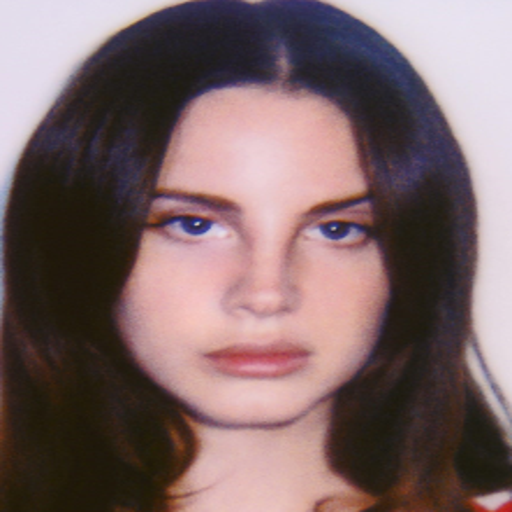

In [5]:
img = crop_img('1207964.jpg')
img

In [8]:
out = pipe(prompt="Refashion the photo into a sticker.",
                              image=img,
                              ip_adapter_image=img,
                              num_inference_steps=4,
                              image_guidance_scale=1,
                              guidance_scale=2,
                              generator=generator,
                              num_images_per_prompt=9).images

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_instruct_pix2pix.py:858: FutureWarning: You have passed 9 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/4 [00:00<?, ?it/s]

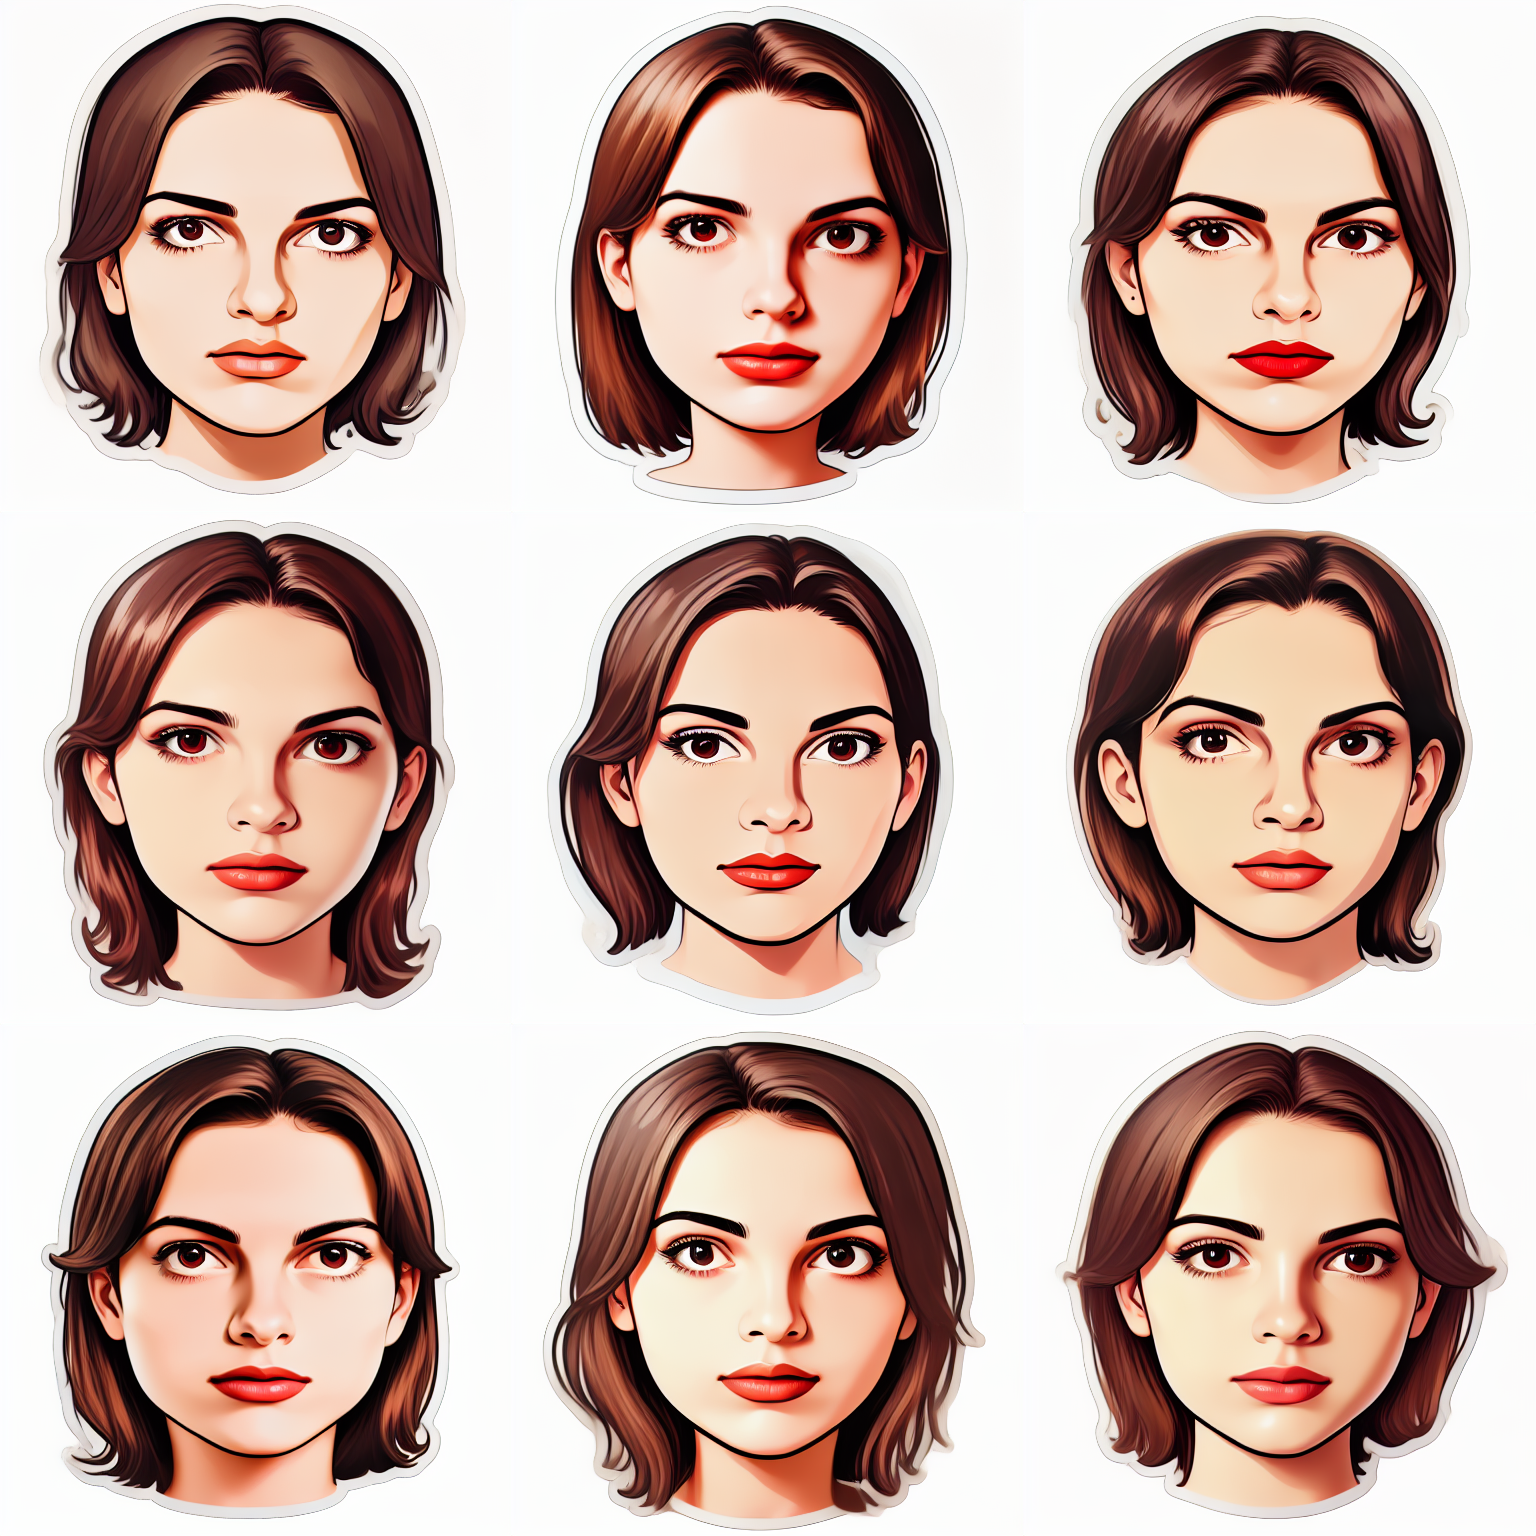

In [11]:
grid = image_grid(out, 3, 3)
grid